# Proyecto Modulo 5: Fashion-MNIST Project

In [1]:
# Importamos las librerias
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image

### Questions 1: Create a Dataset Class

In [2]:
from torch.utils.data import Dataset
from torchvision import transforms,datasets
img_size = 16
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_size, img_size)),
])

train_data = datasets.FashionMNIST (root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST (root='./data', train=False, download=True, transform=transform)


class FashionMNISTDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        img, label = self.data[idx]
        return img, label
    
# Cargamos los datos
train_dataset = FashionMNISTDataset(train_data)
test_dataset = FashionMNISTDataset(test_data)

img, label = train_dataset[0]
print(f"Image shape: {img.shape}, Label: {label}")

Image shape: torch.Size([1, 16, 16]), Label: 9


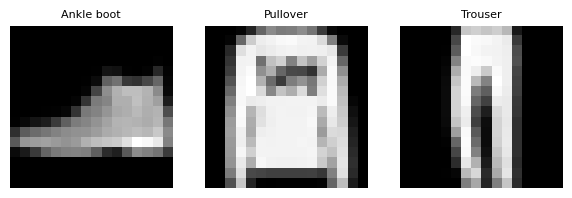

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_data(dataset, n=3):
    fig, axes = plt.subplots(1, n, figsize=(n*2, 2))
    for i in range(n):
        img, label = dataset[i]
        img = img.squeeze(0).numpy()  # Remove channel dim
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(class_names[label], fontsize=8)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Show first 3 images from validation (test) dataset
show_data(test_dataset, n=3)

# Questions 2


### Create the CNN Model.

In [11]:
class CNN_batch(nn.Module):
    def __init__(self,out_1 = 16, out_2 = 32, number_of_classes = 10):
        super(CNN_batch, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding = 2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1 = nn.MaxPool2d(kernel_size = 2)

        self.conv2 = nn.Conv2d(in_channels = out_1, out_channels = out_2, kernel_size = 5, padding = 2)
        self.conv2_bn = nn.BatchNorm2d(out_2)
        self.maxpool2 = nn.MaxPool2d(kernel_size = 2)

        self.fc = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.fc_bn = nn.BatchNorm1d(number_of_classes)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv1_bn(x)
        x = torch.relu (x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.conv2_bn(x)
        x = torch.relu (x)
        x = self.maxpool2(x)

        x = x.view(x.size(0), -1)
        x = self.fc(x)
        x = self.fc_bn(x)
        return x

In [8]:
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=100 )
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=100 )

### Train the model.

In [15]:
import time

time = time.time()
model =CNN_batch(out_1=16, out_2=32,number_of_classes=10)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

cost_list = []
accuracy = []
n_test = len(test_dataset)
n_epochs = 10
for epoch in range(n_epochs):
    cost = 0
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost += loss.item()
        verbose = True
        if verbose:
            print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')
    correct = 0
    model.eval()
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, y_pred = torch.max(z.data, 1)
        correct += (y_pred == y_test).sum().item()
    print(f'Accuracy of the model on the test set: {100 * correct / n_test:.2f}%')
    accuracy.append(correct / n_test)
    cost_list.append(cost)


Epoch [1/10], Loss: 2.5863
Epoch [1/10], Loss: 2.3572
Epoch [1/10], Loss: 2.1749
Epoch [1/10], Loss: 1.9833
Epoch [1/10], Loss: 1.8868
Epoch [1/10], Loss: 1.8342
Epoch [1/10], Loss: 1.8220
Epoch [1/10], Loss: 1.7186
Epoch [1/10], Loss: 1.6067
Epoch [1/10], Loss: 1.6048
Epoch [1/10], Loss: 1.6866
Epoch [1/10], Loss: 1.6988
Epoch [1/10], Loss: 1.6225
Epoch [1/10], Loss: 1.6047
Epoch [1/10], Loss: 1.4486
Epoch [1/10], Loss: 1.3433
Epoch [1/10], Loss: 1.3559
Epoch [1/10], Loss: 1.4055
Epoch [1/10], Loss: 1.4770
Epoch [1/10], Loss: 1.3965
Epoch [1/10], Loss: 1.3950
Epoch [1/10], Loss: 1.3596
Epoch [1/10], Loss: 1.2845
Epoch [1/10], Loss: 1.3004
Epoch [1/10], Loss: 1.3744
Epoch [1/10], Loss: 1.3778
Epoch [1/10], Loss: 1.2651
Epoch [1/10], Loss: 1.4334
Epoch [1/10], Loss: 1.4257
Epoch [1/10], Loss: 1.3577
Epoch [1/10], Loss: 1.3431
Epoch [1/10], Loss: 1.2896
Epoch [1/10], Loss: 1.2905
Epoch [1/10], Loss: 1.3066
Epoch [1/10], Loss: 1.2392
Epoch [1/10], Loss: 1.3197
Epoch [1/10], Loss: 1.2080
E

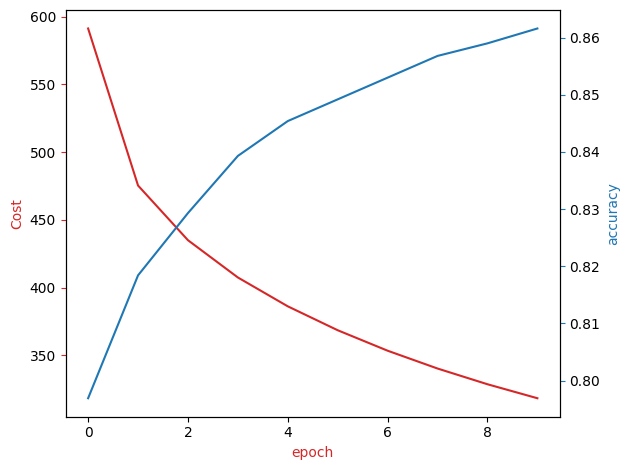

In [16]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()